# US Ski Resorts

What US ski resorts is the best to ski at?

Factors to Consider
1. Summit and Base
2. The Vertical
3.	Acreage
4. Lifts and Runs

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [33]:
filepath = "ski_resort_stats.xlsx"

ski_df = pd.read_excel(filepath, skiprows=1)
print("done")


done


Summit and Base

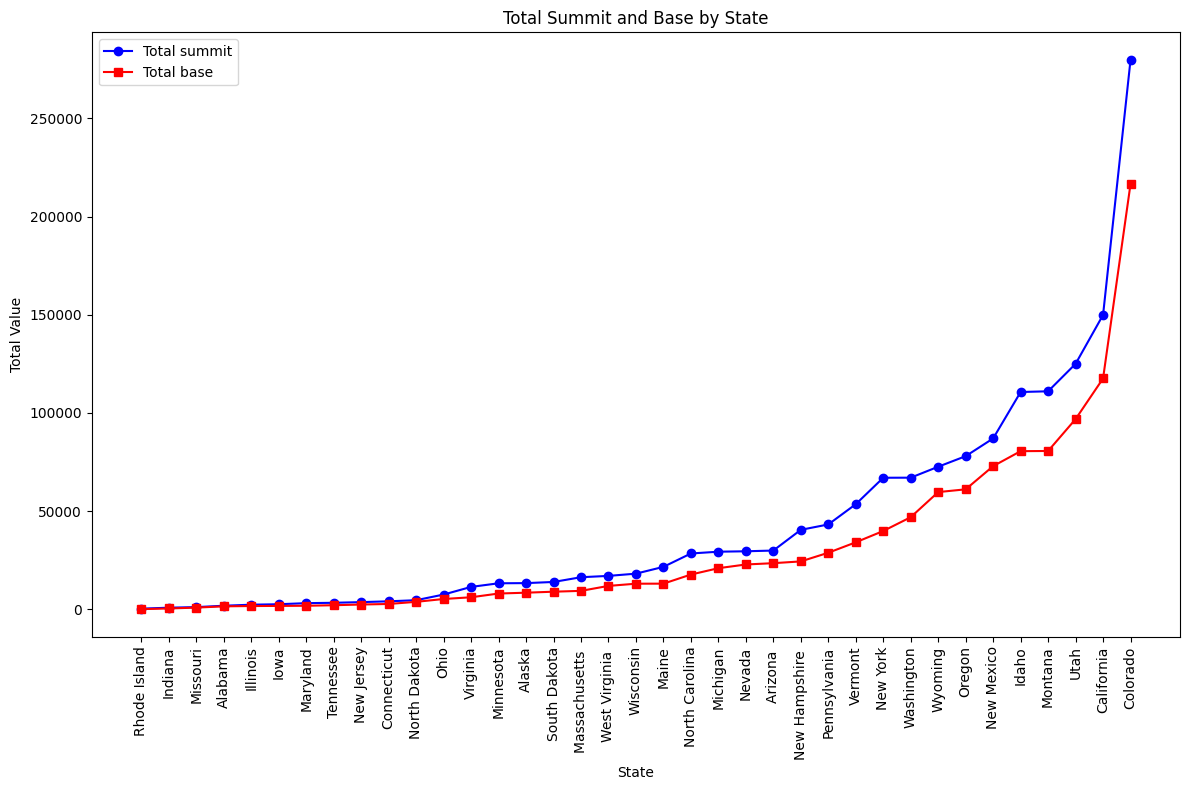

In [49]:
sorted_df_summit = ski_df.sort_values(by='summit')
unique_states_summit = sorted_df_summit['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_totals_summit = []
for state in unique_states_summit:
    state_data = sorted_df_summit[sorted_df_summit['state'] == state]
    total_summit = state_data['summit'].sum()
    state_totals_summit.append((state, total_summit))

state_totals_summit.sort(key=lambda x: x[1])

x_values_summit = [i for i, (_, total_summit) in enumerate(state_totals_summit)]
y_values_summit = [total_summit for (_, total_summit) in state_totals_summit]

ax.plot(x_values_summit, y_values_summit, marker='o', linestyle='-', color='b', label='Total summit')

sorted_df_base = ski_df.sort_values(by='base')
unique_states_base = sorted_df_base['state'].unique()

state_totals_base = []
for state in unique_states_base:
    state_data = sorted_df_base[sorted_df_base['state'] == state]
    total_base = state_data['base'].sum()
    state_totals_base.append((state, total_base))

state_totals_base.sort(key=lambda x: x[1])

x_values_base = [i for i, (_, total_base) in enumerate(state_totals_base)]
y_values_base = [total_base for (_, total_base) in state_totals_base]

ax.plot(x_values_base, y_values_base, marker='s', linestyle='-', color='r', label='Total base')

# Customize plot appearance
ax.set_xticks(x_values_summit)
ax.set_xticklabels([state for state, _ in state_totals_summit], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Total Value')
ax.set_title('Total Summit and Base by State')
ax.legend()

plt.tight_layout()

plt.show()




The Vertical

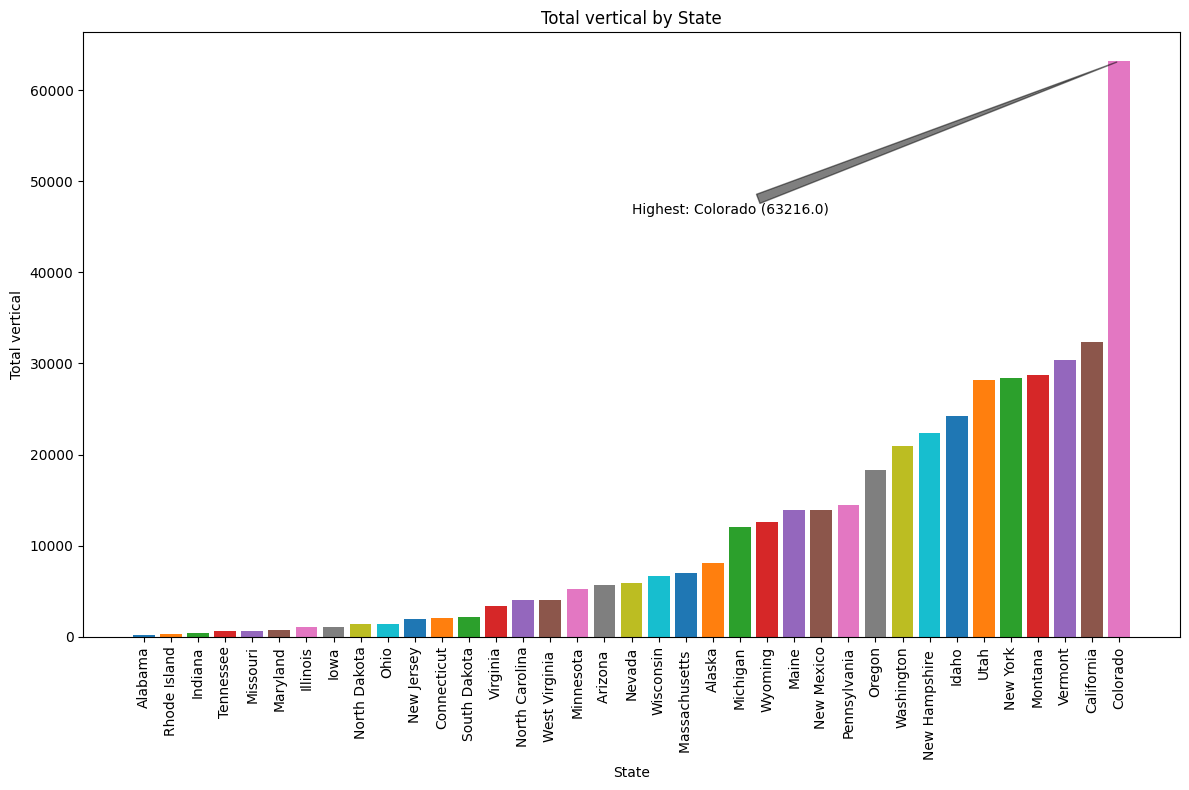

In [50]:
sorted_df = ski_df.sort_values(by='vertical')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_totals = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    total_vertical = state_data['vertical'].sum()
    state_totals.append((state, total_vertical))

state_totals.sort(key=lambda x: x[1])

for i, (state, total_vertical) in enumerate(state_totals):
    x = i
    ax.bar(x, total_vertical, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_totals], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Total vertical')

ax.set_title('Total vertical by State')

highest_state = state_totals[-1][0]
highest_value = state_totals[-1][1]

ax.annotate(f'Highest: {highest_state} ({highest_value})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


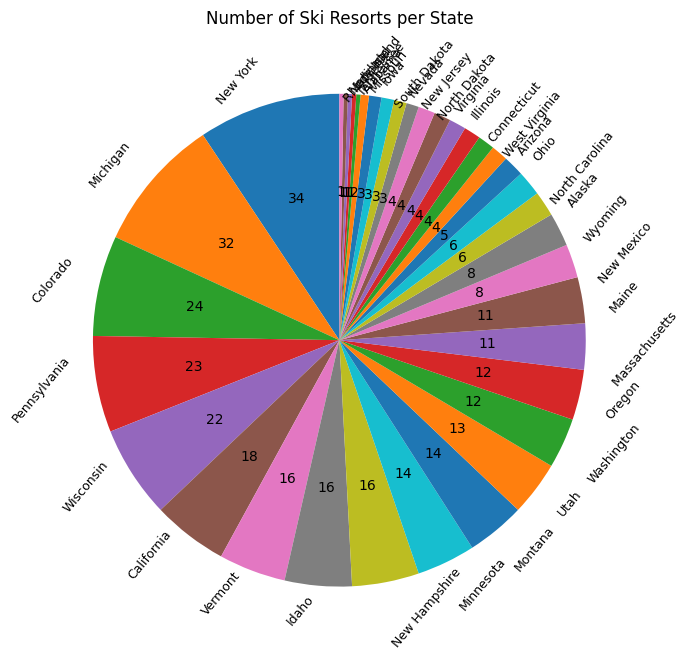

In [38]:
resorts_per_state = ski_df['state'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(resorts_per_state, labels=resorts_per_state.index, autopct=lambda p: '{:.0f}'.format(p * sum(resorts_per_state) / 100),
              startangle=90)
for label in pie[1]:
    label.set_fontsize(9)
    label.set_rotation(50) 

ax.set_title('Number of Ski Resorts per State')

plt.show()


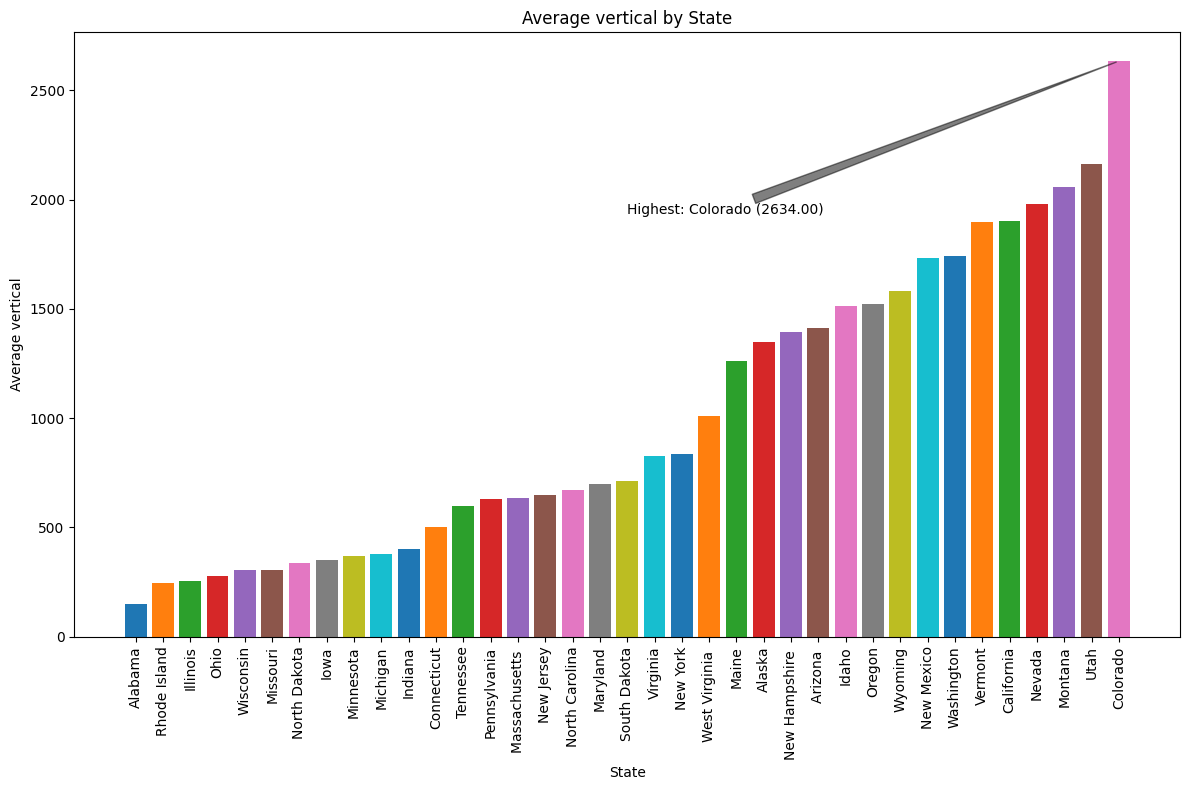

In [51]:
sorted_df = ski_df.sort_values(by='vertical')
unique_states = sorted_df['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_avg_verticals = []
for state in unique_states:
    state_data = sorted_df[sorted_df['state'] == state]
    avg_vertical = state_data['vertical'].mean() 
    state_avg_verticals.append((state, avg_vertical))

state_avg_verticals.sort(key=lambda x: x[1])

for i, (state, avg_vertical) in enumerate(state_avg_verticals):
    x = i
    ax.bar(x, avg_vertical, label=state, align='center')

ax.set_xticks(range(len(unique_states)))
ax.set_xticklabels([state for state, _ in state_avg_verticals], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Average vertical')

ax.set_title('Average vertical by State')

highest_state = state_avg_verticals[-1][0]
highest_value = state_avg_verticals[-1][1]


ax.annotate(f'Highest: {highest_state} ({highest_value:.2f})', xy=(len(unique_states) - 1, highest_value),
            xytext=(0.5, 0.7), textcoords='axes fraction', fontsize=10,
            arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5))

plt.tight_layout()

plt.show()


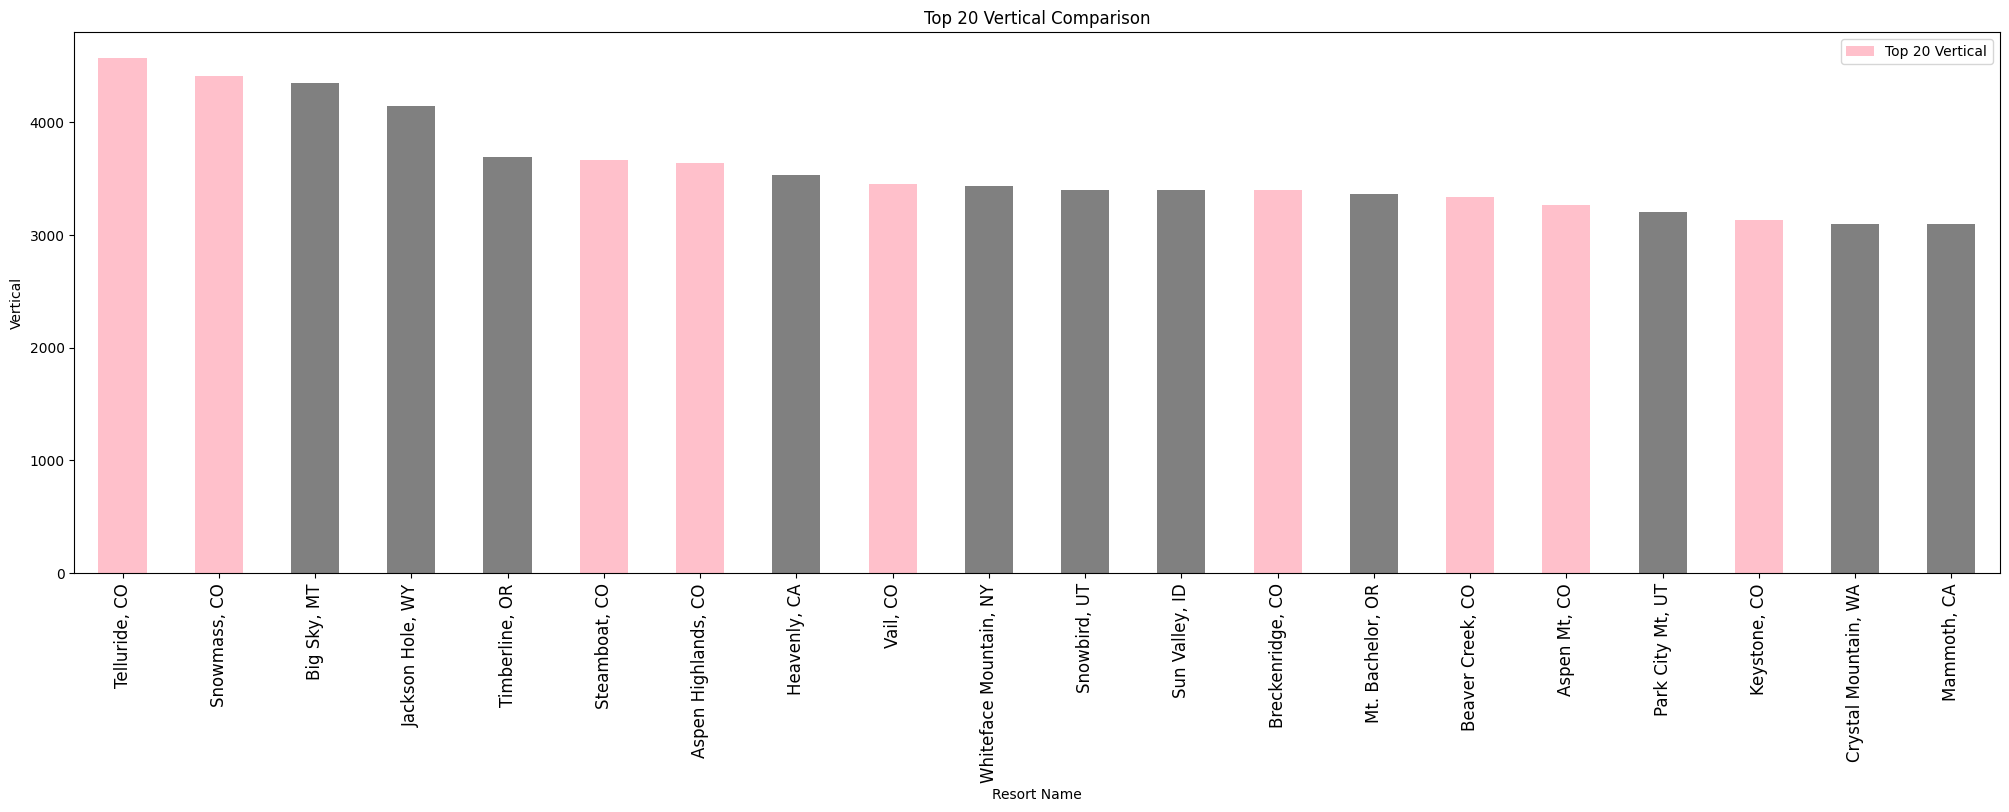

In [40]:
sorted_df = ski_df.sort_values(by='vertical')

top_20_resorts = sorted_df.nlargest(20, 'vertical')

fig, ax = plt.subplots(figsize=(20, 8))

state_palette = {
    'Colorado': 'pink',
}

colors = [state_palette.get(state, 'gray') for state in top_20_resorts['state']]

top_20_resorts.plot(x='resort_name', y='vertical', kind='bar', ax=ax, label='Top 20 Vertical', color=colors)

ax.set_xticks(range(len(top_20_resorts)))
ax.set_xticklabels(top_20_resorts['resort_name'], rotation='vertical', fontsize=12)

plt.tight_layout()

ax.set_title('Top 20 Vertical Comparison')
ax.set_xlabel('Resort Name')
ax.set_ylabel('Vertical')

plt.show()



Map Showing The Vertical

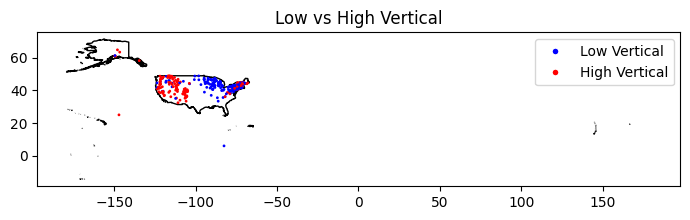

In [41]:
geometry = gpd.points_from_xy(ski_df.lon, ski_df.lat)
gdf = gpd.GeoDataFrame(ski_df, geometry=geometry)

us_boundaries = gpd.read_file('usa.json')

median_vertical = gdf['vertical'].median()

sorted_states = gdf.sort_values(by='vertical')

top_50_percent = sorted_states.iloc[int(len(sorted_states) * 0.5):]
bottom_50_percent = sorted_states.iloc[:int(len(sorted_states) * 0.5)]

gdf.loc[gdf.index.isin(top_50_percent.index), 'color'] = 'red'
gdf.loc[gdf.index.isin(bottom_50_percent.index), 'color'] = 'blue'

fig, ax = plt.subplots(figsize=(20, 2)) 

us_boundaries.plot(ax=ax, color='white', edgecolor='black')

gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=1, label='Ski Resorts')

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=5, label='Low Vertical'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=5, label='High Vertical')
]

ax.legend(handles=legend_elements, loc='upper right')

ax.set_title('Low vs High Vertical')
plt.show()



Lifts and Runs

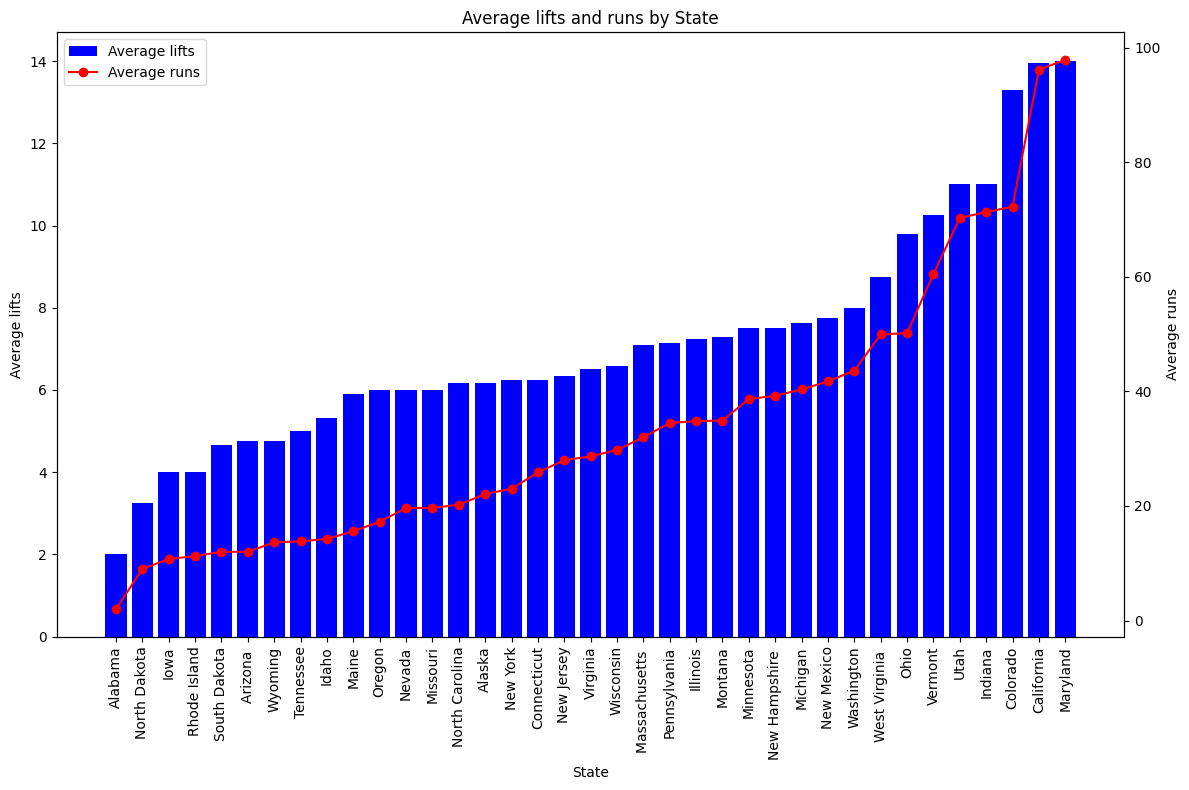

In [44]:
import matplotlib.pyplot as plt

# Average lifts plot
sorted_df_lifts = ski_df.sort_values(by='lifts')
unique_states_lifts = sorted_df_lifts['state'].unique()
fig, ax1 = plt.subplots(figsize=(12, 8))

state_avg_lifts = []
for state in unique_states_lifts:
    state_data = sorted_df_lifts[sorted_df_lifts['state'] == state]
    avg_lifts = state_data['lifts'].mean()
    state_avg_lifts.append((state, avg_lifts))

state_avg_lifts.sort(key=lambda x: x[1])

x_values_lifts = [i for i, (_, avg_lifts) in enumerate(state_avg_lifts)]
y_values_lifts = [avg_lifts for (_, avg_lifts) in state_avg_lifts]

ax1.bar(x_values_lifts, y_values_lifts, color='b', label='Average lifts')
ax1.set_xticks(x_values_lifts)
ax1.set_xticklabels([state for state, _ in state_avg_lifts], rotation='vertical')

ax1.set_xlabel('State')
ax1.set_ylabel('Average lifts')
ax1.set_title('Average lifts and runs by State')

# Create a twin Axes for average runs
ax2 = ax1.twinx()

# Average runs plot
sorted_df_runs = ski_df.sort_values(by='runs')
unique_states_runs = sorted_df_runs['state'].unique()

state_avg_runs = []
for state in unique_states_runs:
    state_data = sorted_df_runs[sorted_df_runs['state'] == state]
    avg_runs = state_data['runs'].mean()
    state_avg_runs.append((state, avg_runs))

state_avg_runs.sort(key=lambda x: x[1])

x_values_runs = [i for i, (_, avg_runs) in enumerate(state_avg_runs)]
y_values_runs = [avg_runs for (_, avg_runs) in state_avg_runs]

ax2.plot(x_values_runs, y_values_runs, marker='o', linestyle='-', color='r', label='Average runs')
ax2.set_ylabel('Average runs')

# Legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

plt.show()


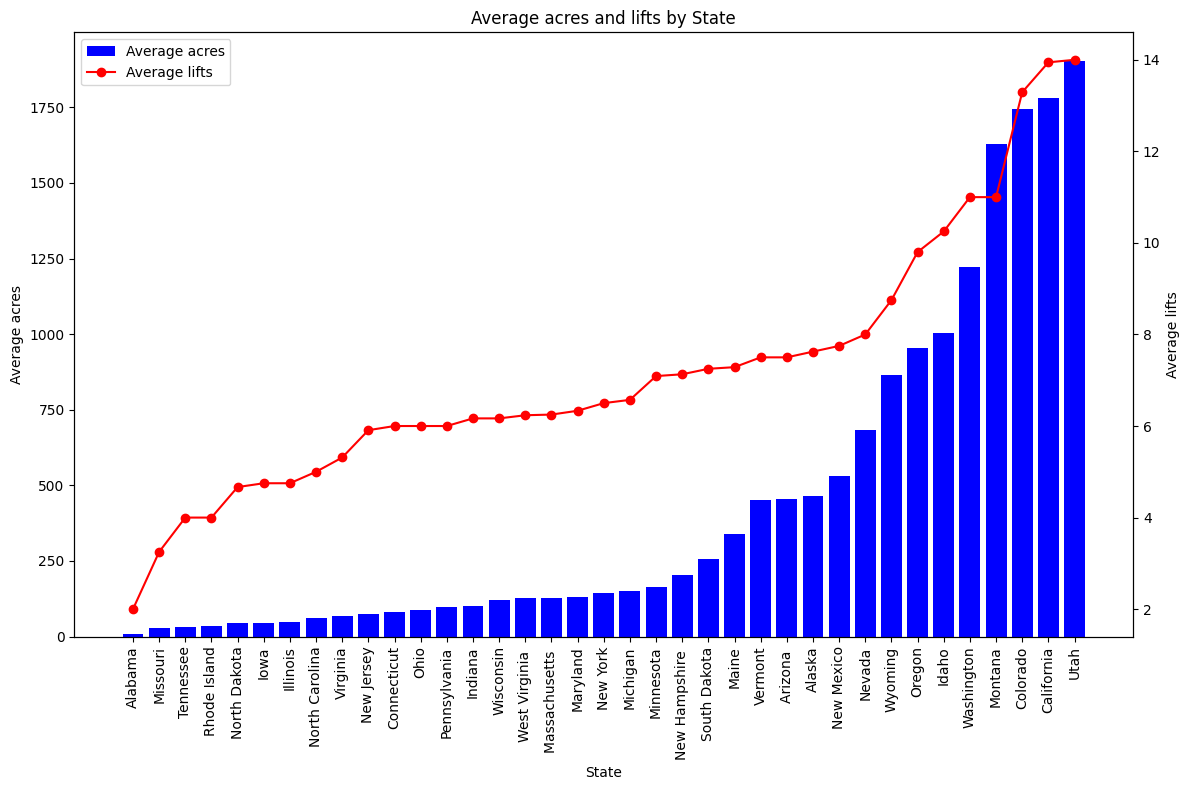

In [45]:
import matplotlib.pyplot as plt

# Average acres plot
sorted_df_acres = ski_df.sort_values(by='acres')
unique_states_acres = sorted_df_acres['state'].unique()
fig, ax1 = plt.subplots(figsize=(12, 8))

state_avg_acres = []
for state in unique_states_acres:
    state_data = sorted_df_acres[sorted_df_acres['state'] == state]
    avg_acres = state_data['acres'].mean()
    state_avg_acres.append((state, avg_acres))

state_avg_acres.sort(key=lambda x: x[1])

x_values_acres = [i for i, (_, avg_acres) in enumerate(state_avg_acres)]
y_values_acres = [avg_acres for (_, avg_acres) in state_avg_acres]

ax1.bar(x_values_acres, y_values_acres, color='b', label='Average acres')
ax1.set_xticks(x_values_acres)
ax1.set_xticklabels([state for state, _ in state_avg_acres], rotation='vertical')

ax1.set_xlabel('State')
ax1.set_ylabel('Average acres')
ax1.set_title('Average acres and lifts by State')

# Create a twin Axes for average lifts
ax2 = ax1.twinx()

# Average lifts plot
sorted_df_lifts = ski_df.sort_values(by='lifts')
unique_states_lifts = sorted_df_lifts['state'].unique()

state_avg_lifts = []
for state in unique_states_lifts:
    state_data = sorted_df_lifts[sorted_df_lifts['state'] == state]
    avg_lifts = state_data['lifts'].mean()
    state_avg_lifts.append((state, avg_lifts))

state_avg_lifts.sort(key=lambda x: x[1])

x_values_lifts = [i for i, (_, avg_lifts) in enumerate(state_avg_lifts)]
y_values_lifts = [avg_lifts for (_, avg_lifts) in state_avg_lifts]

ax2.plot(x_values_lifts, y_values_lifts, marker='o', linestyle='-', color='r', label='Average lifts')
ax2.set_ylabel('Average lifts')

# Legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()

plt.show()


Green, Blue and Black run Comparison

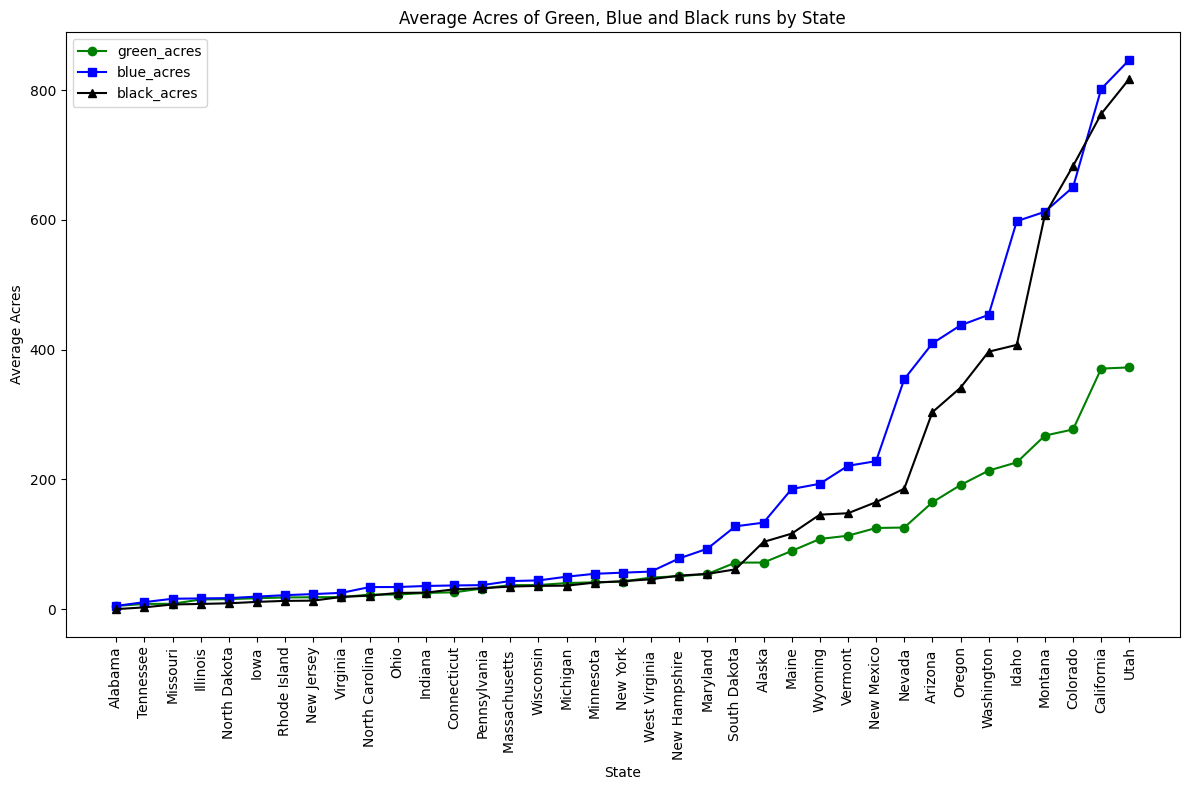

In [46]:
import matplotlib.pyplot as plt

# Average green_acres plot
sorted_df_green = ski_df.sort_values(by='green_acres')
unique_states_green = sorted_df_green['state'].unique()
fig, ax = plt.subplots(figsize=(12, 8))

state_avg_green_acres = []
for state in unique_states_green:
    state_data = sorted_df_green[sorted_df_green['state'] == state]
    avg_green_acres = state_data['green_acres'].mean()
    state_avg_green_acres.append((state, avg_green_acres))

state_avg_green_acres.sort(key=lambda x: x[1])

x_values_green = [i for i, (_, avg_green_acres) in enumerate(state_avg_green_acres)]
y_values_green = [avg_green_acres for (_, avg_green_acres) in state_avg_green_acres]

ax.plot(x_values_green, y_values_green, marker='o', linestyle='-', color='green', label='green_acres')

# Average blue_acres plot
sorted_df_blue = ski_df.sort_values(by='blue_acres')
unique_states_blue = sorted_df_blue['state'].unique()

state_avg_blue_acres = []
for state in unique_states_blue:
    state_data = sorted_df_blue[sorted_df_blue['state'] == state]
    avg_blue_acres = state_data['blue_acres'].mean()
    state_avg_blue_acres.append((state, avg_blue_acres))

state_avg_blue_acres.sort(key=lambda x: x[1])

x_values_blue = [i for i, (_, avg_blue_acres) in enumerate(state_avg_blue_acres)]
y_values_blue = [avg_blue_acres for (_, avg_blue_acres) in state_avg_blue_acres]

ax.plot(x_values_blue, y_values_blue, marker='s', linestyle='-', color='blue', label='blue_acres')

# Average black_acres plot
sorted_df_black = ski_df.sort_values(by='black_acres')
unique_states_black = sorted_df_black['state'].unique()

state_avg_black_acres = []
for state in unique_states_black:
    state_data = sorted_df_black[sorted_df_black['state'] == state]
    avg_black_acres = state_data['black_acres'].mean()
    state_avg_black_acres.append((state, avg_black_acres))

state_avg_black_acres.sort(key=lambda x: x[1])

x_values_black = [i for i, (_, avg_black_acres) in enumerate(state_avg_black_acres)]
y_values_black = [avg_black_acres for (_, avg_black_acres) in state_avg_black_acres]

ax.plot(x_values_black, y_values_black, marker='^', linestyle='-', color='black', label='black_acres')

# Customize plot appearance
ax.set_xticks(x_values_green)
ax.set_xticklabels([state for state, _ in state_avg_green_acres], rotation='vertical')

ax.set_xlabel('State')
ax.set_ylabel('Average Acres')
ax.set_title('Average Acres of Green, Blue and Black runs by State')
ax.legend()

plt.tight_layout()

plt.show()



